Arima and Seasonal Arima

Autoregressive Integrated Moving Averages

The general process foe Arima:
1. visualize the time series data
2. make the time series data stationary
3. Plot the correlation and Auto correlation charts
4. Construct Arima model or seasonal Arima modle based on the data
5. use the model to make predictions


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load in the time series
df = pd.read_csv('/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/Datasets/HistoricalData_1726966234397.csv', index_col='Date',parse_dates=True)



In [164]:
df.head(5)
# Remove the dollar signs and convert to float
df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/lh/pn4102q9087_mb9nf82y9t600000gn/T/ipykernel_12890/792139325.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)


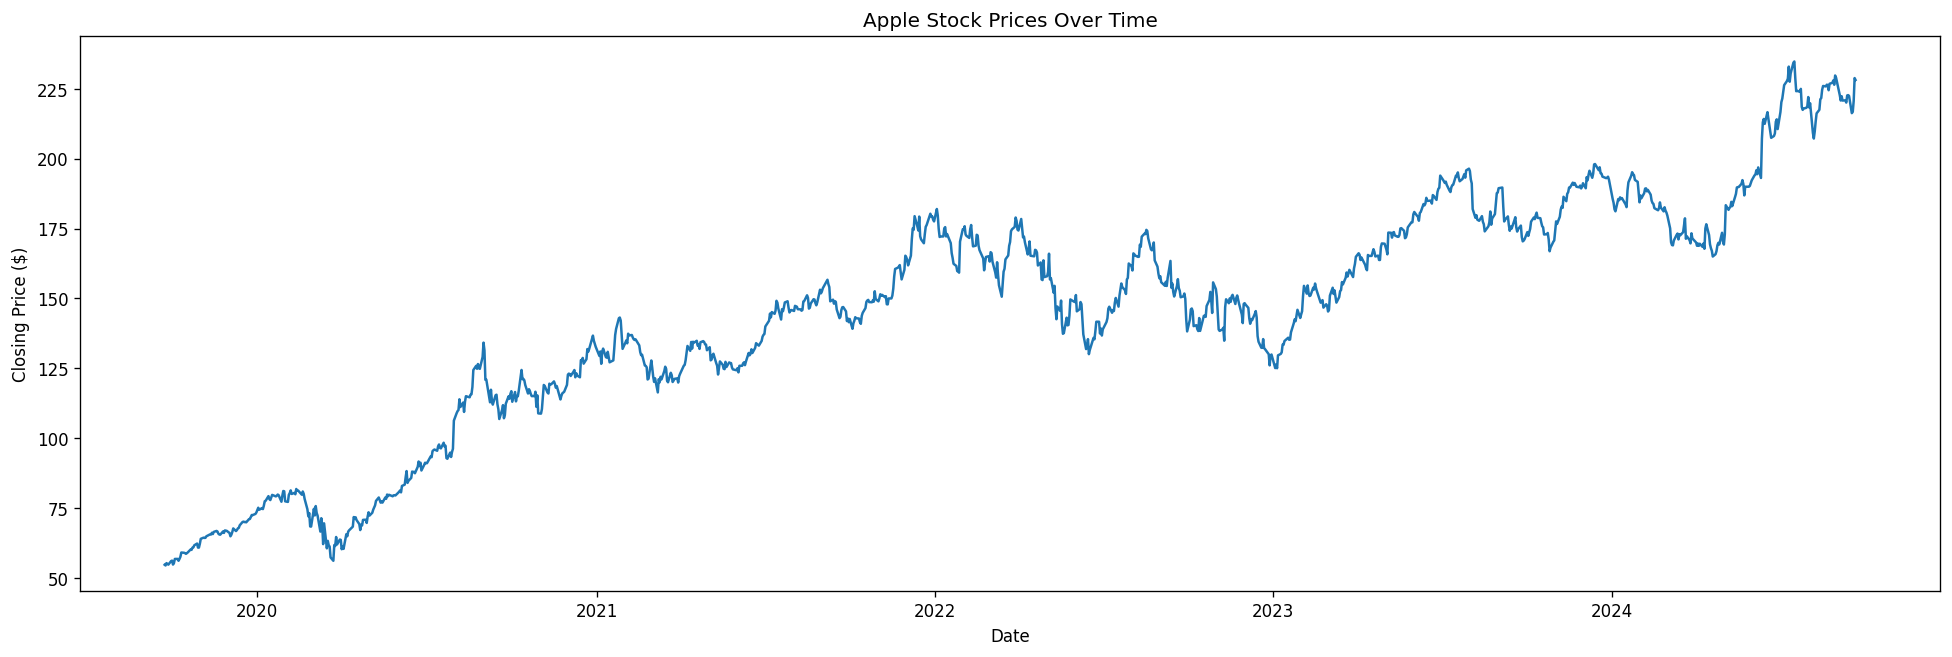

In [165]:
# Load in the time series
#df['Date'] = pd.to_datetime(df.Date)
plt.figure(figsize=(20, 6))
plt.plot(df["Close/Last"])
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.title("Apple Stock Prices Over Time")
plt.show()

In [166]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close/Last'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1]>0.05:
    print("Not Stationary")
else:
    print(" Stationary")

ADF Statistic: -0.987348
p-value: 0.757851
Not Stationary


In [167]:
df_diff=df['Close/Last'].diff().dropna()

In [170]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1]>0.05:
    print("Not Stationary")
else:
    print(" Stationary")

ADF Statistic: -35.993460
p-value: 0.000000
 Stationary


In [185]:
from statsmodels.tsa.arima.model import ARIMA
model_fit=ARIMA(df_diff,order=(0,1,1))
results=model_fit.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:             Close/Last   No. Observations:                 1257
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3003.098
Date:                Sun, 22 Sep 2024   AIC                           6010.196
Time:                        18:44:56   BIC                           6020.468
Sample:                             0   HQIC                          6014.057
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.032    -31.656      0.000      -1.062      -0.938
sigma2         6.9497      0.285     24.423      0.000       6.392       7.507
Ljung-Box (L1) (Q):                   0.28   Jarque-

/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pavantalapaneni/Documents/GitHub/Projects/Projects/ml algorithms/

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'